<h3> R Notebook for predicting expression and scoring the results. 

Reading in Feature Matrix

In [1]:
featureMatrix=read.csv("training_matrix.csv", header = TRUE)

Modifying featureMatrix to make it friendly for Multivariate Linear Regression Parameter Estimation

In [2]:
featureMatrix=t(featureMatrix)
motifs=featureMatrix[1,]
featureMatrix=featureMatrix[-1,]
colnames(featureMatrix)=motifs
#Seeing what the Motifs are.
print(motifs)
#Printing a sample to see if everything was done correctly
head(featureMatrix)

 [1] "GTA[TC]GG[GA]TG"       "TTTTTTTTC"             "ATGT[AG]TGGG"         
 [4] "TT[TC]TTTTTT"          "[TG]C[CG]GCCT[AG][GC]" "ATC[CT]GTACA"         
 [7] "TTTTTC[AC]A"           "CCCGGCCC"              "GGCCCTGGC"            
[10] "[TC][CG][GC]CGCGTC"   


,GTA[TC]GG[GA]TG,TTTTTTTTC,ATGT[AG]TGGG,TT[TC]TTTTTT,[TG]C[CG]GCCT[AG][GC],ATC[CT]GTACA,TTTTTC[AC]A,CCCGGCCC,GGCCCTGGC,[TC][CG][GC]CGCGTC
RPL10,0,2,0,1,0,0,0,0,0,0
RPL11B,1,1,1,0,0,0,0,0,0,0
RPL12A,0,0,1,0,2,1,0,0,0,1
RPL13A,1,2,1,1,2,0,2,0,0,0
RPL13B,2,1,1,0,1,1,0,0,0,1
RPL14A,1,2,1,0,1,1,1,0,0,1


In [3]:
#Adding ones to first column for the estimation step
featureMatrix=cbind(rep(1,nrow(featureMatrix)),featureMatrix)
colnames(featureMatrix)=c("Ones",motifs)
#Printing a Sample to See if everything is correct
head(featureMatrix)

,Ones,GTA[TC]GG[GA]TG,TTTTTTTTC,ATGT[AG]TGGG,TT[TC]TTTTTT,[TG]C[CG]GCCT[AG][GC],ATC[CT]GTACA,TTTTTC[AC]A,CCCGGCCC,GGCCCTGGC,[TC][CG][GC]CGCGTC
RPL10,1,0,2,0,1,0,0,0,0,0,0
RPL11B,1,1,1,1,0,0,0,0,0,0,0
RPL12A,1,0,0,1,0,2,1,0,0,0,1
RPL13A,1,1,2,1,1,2,0,2,0,0,0
RPL13B,1,2,1,1,0,1,1,0,0,0,1
RPL14A,1,1,2,1,0,1,1,1,0,0,1


Reading in expression values recorded for training set

In [4]:
expressionValues=read.table("DREAM6_ExPred_PromoterActivities.txt",header=FALSE)
head(expressionValues)
promoterNames=expressionValues[,1]
expressionValues=expressionValues[,-1]

,V1,V2
1,RPL10,2.84
2,RPL11B,1.59
3,RPL12A,0.92
4,RPL13A,1.2
5,RPL13B,1.66
6,RPL14A,1.62


Now that we have both the Feature matrix X and the observed values y we can use Normal Equations to find the closed form solution. Normal Equations are feasible in this case because the number of features are not very large.

The parameter vector theta can be estimated as follows:
$$ \theta= (X^{T}X)^{-1}X^{T}y$$

In [5]:
featureMatrix=t(apply(featureMatrix,1,strtoi))
colnames(featureMatrix)=colnames(featureMatrix)=c("Ones",motifs)
#Printing a sample to see if everything is ok
head(featureMatrix)

,Ones,GTA[TC]GG[GA]TG,TTTTTTTTC,ATGT[AG]TGGG,TT[TC]TTTTTT,[TG]C[CG]GCCT[AG][GC],ATC[CT]GTACA,TTTTTC[AC]A,CCCGGCCC,GGCCCTGGC,[TC][CG][GC]CGCGTC
RPL10,1,0,2,0,1,0,0,0,0,0,0
RPL11B,1,1,1,1,0,0,0,0,0,0,0
RPL12A,1,0,0,1,0,2,1,0,0,0,1
RPL13A,1,1,2,1,1,2,0,2,0,0,0
RPL13B,1,2,1,1,0,1,1,0,0,0,1
RPL14A,1,1,2,1,0,1,1,1,0,0,1


In [6]:
#Using standard Notation
X=featureMatrix
y=expressionValues
theta=solve(t(X)%*%(X))%*%t(X)%*%y
rownames(theta)= NULL 
#Printing calculated Values of Theta
print(theta)

              [,1]
 [1,]  1.691091520
 [2,]  0.037912910
 [3,]  0.118572795
 [4,] -0.184852803
 [5,]  0.086321790
 [6,] -0.129624600
 [7,] -0.081866230
 [8,]  0.007193555
 [9,] -0.070986256
[10,] -0.378224878
[11,] -0.133789078


Reading in prediction matrix

In [7]:
predictionMatrix=read.csv("testing_matrix.csv",header=TRUE)

Modifying predictionMatrix to a more friendly format

In [8]:
predictionMatrix=t(predictionMatrix)
motifs=predictionMatrix[1,]
predictionMatrix=predictionMatrix[-1,]
predictionMatrix=t(apply(predictionMatrix,1,strtoi))
#Adding ones as an extra column in the input Matrix
predictionMatrix=cbind(rep(1,nrow(predictionMatrix)),predictionMatrix)
colnames(predictionMatrix)=c("Ones",motifs)
#Seeing what the Motifs are.
print(motifs)
#Printing a sample to see if everything was done correctly
head(predictionMatrix)

 [1] "GTA[TC]GG[GA]TG"       "TTTTTTTTC"             "ATGT[AG]TGGG"         
 [4] "TT[TC]TTTTTT"          "[TG]C[CG]GCCT[AG][GC]" "ATC[CT]GTACA"         
 [7] "TTTTTC[AC]A"           "CCCGGCCC"              "GGCCCTGGC"            
[10] "[TC][CG][GC]CGCGTC"   


,Ones,GTA[TC]GG[GA]TG,TTTTTTTTC,ATGT[AG]TGGG,TT[TC]TTTTTT,[TG]C[CG]GCCT[AG][GC],ATC[CT]GTACA,TTTTTC[AC]A,CCCGGCCC,GGCCCTGGC,[TC][CG][GC]CGCGTC
RPL11A,1,1,2,0,2,0,0,0,0,0,0
RPL12B,1,0,0,0,0,0,0,0,0,0,0
RPL21A,1,0,0,0,0,0,0,0,0,0,0
RPL21B,1,0,0,0,0,0,0,0,0,0,0
RPL26A,1,0,1,1,1,0,1,0,0,0,0
RPL28,1,0,0,0,0,0,1,0,0,0,0


In [9]:
#Printing predicted values:
predictedExpressionValues=t(theta)%*%t(predictionMatrix)
#Printing a sample of the results
head(predictedExpressionValues)
#Verifying dimensions are correct
dim(predictedExpressionValues)

RPL11A,RPL12B,RPL21A,RPL21B,RPL26A,RPL28,RPL35B,RPL37A,RPL37B,RPL42A,,RPL7B_Mut1,RPL7B_Mut2,RPL8A_Mut1,RPL8A_Mut2,RPL8A_Mut3,RPP1B_Mut1,RPS12_Mut1,RPS14B_Mut1,RPS20_Mut1,RPS9A_Mut1
2.1387936013599,1.69109152015517,1.69109152015517,1.69109152015517,1.62926707213444,1.6092252897616,1.80966431523884,1.73225364476081,1.89598610554795,1.77741331046428,⋯,1.61641884486677,1.6092252897616,1.89598610554795,1.89598610554795,1.89598610554795,1.6092252897616,1.6092252897616,1.69109152015517,1.69109152015517,1.77741331046428


[1]  1 53

Reading in Gold standard dataset for scoring of prediction

In [10]:
goldStandard=read.table("dream6_expred_predictions_gold_standard_0.txt", header=FALSE)

In [11]:
actualExpressionValues=goldStandard[,2]
#Converting to the right format for regression
predictedExpressionValues=as.numeric(predictedExpressionValues)
reg=lm(predictedExpressionValues~actualExpressionValues)

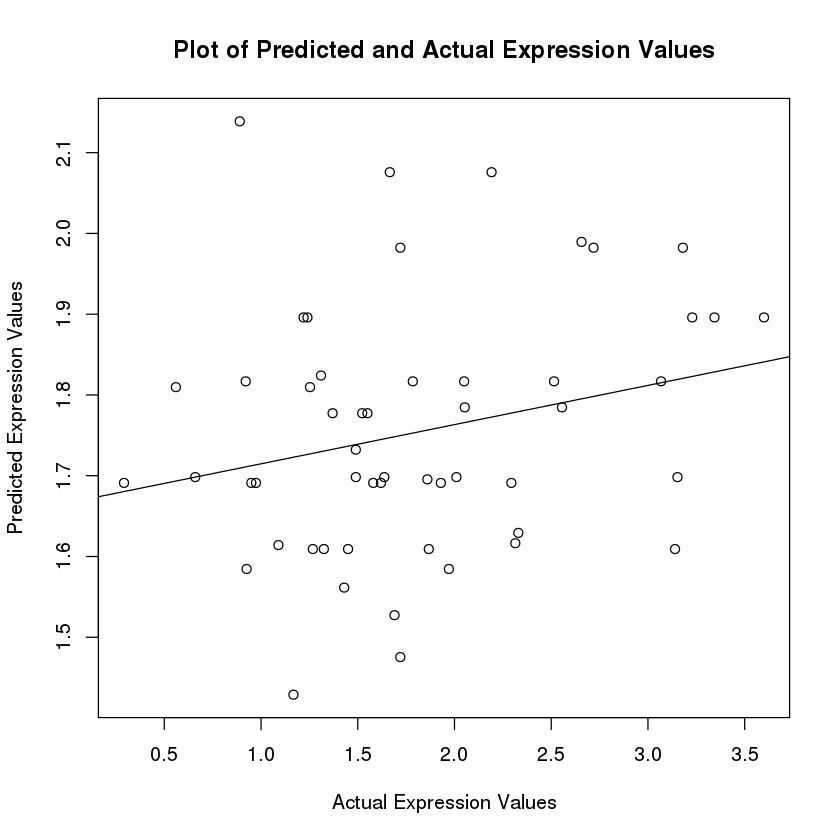

In [12]:
plot(actualExpressionValues,predictedExpressionValues,xlab="Actual Expression Values",
     ylab="Predicted Expression Values",main="Plot of Predicted and Actual Expression Values")
abline(reg)

Calculating Correlation and P-Value for Correlation of actual vs predictedExpressionValues

In [13]:
cor.test(actualExpressionValues,predictedExpressionValues)


	Pearson's product-moment correlation

data:  actualExpressionValues and predictedExpressionValues
t = 1.7896, df = 51, p-value = 0.07945
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.02912671  0.48172382
sample estimates:
      cor 
0.2430808 
